In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob

sns.set_theme(style="whitegrid")

In [21]:
df = pd.read_stata('gerber_generalizability_2/PublicReplicationData.dta')
df = df[df['state'] == 'TX']
# pop_counts = df['state'].value_counts()
df.columns

Index(['id', 'hhid', 'state', 'treat', 'voted06', 'voted08', 'voted09',
       'voted10', 'voted11', 'voted12', 'voted13', 'voted14', 'i_age',
       'age_miss', 'age2', 'flag_hhid_mult_hhid', 'flag_hhid_mult_z',
       'flag_drop_hhid', 'vote_hist', 'state_median', 'vh_stratum', 'vhblw',
       'vhavg', 'vhabv', 'd_race_b', 'd_race_h', 'd_race_o', 'd_race_w',
       'd_female', 'd_notfem', 'd_married', 'd_unmarried', 'd_st_AK',
       'd_st_AR', 'd_st_AZ', 'd_st_CO', 'd_st_FL', 'd_st_GA', 'd_st_IA',
       'd_st_KS', 'd_st_KY', 'd_st_LA', 'd_st_ME', 'd_st_MI', 'd_st_NC',
       'd_st_NH', 'd_st_SD', 'd_st_TX', 'd_st_WI', 'hhsize', 'd_hhsize1',
       'd_hhsize2', 'd_hhsize3', 'd_hhsize4', 'ipw_h_vvhvid',
       'ipw_h_exnclt23_vvhvid', 'ipw_sh_exnclt23', 'ipw_p_exnclt23_vvh',
       'ipw_p_vvhvid', 'ipw_p_vvh', 'ipw_p_noex', 'salience', 'hi_salience'],
      dtype='object')

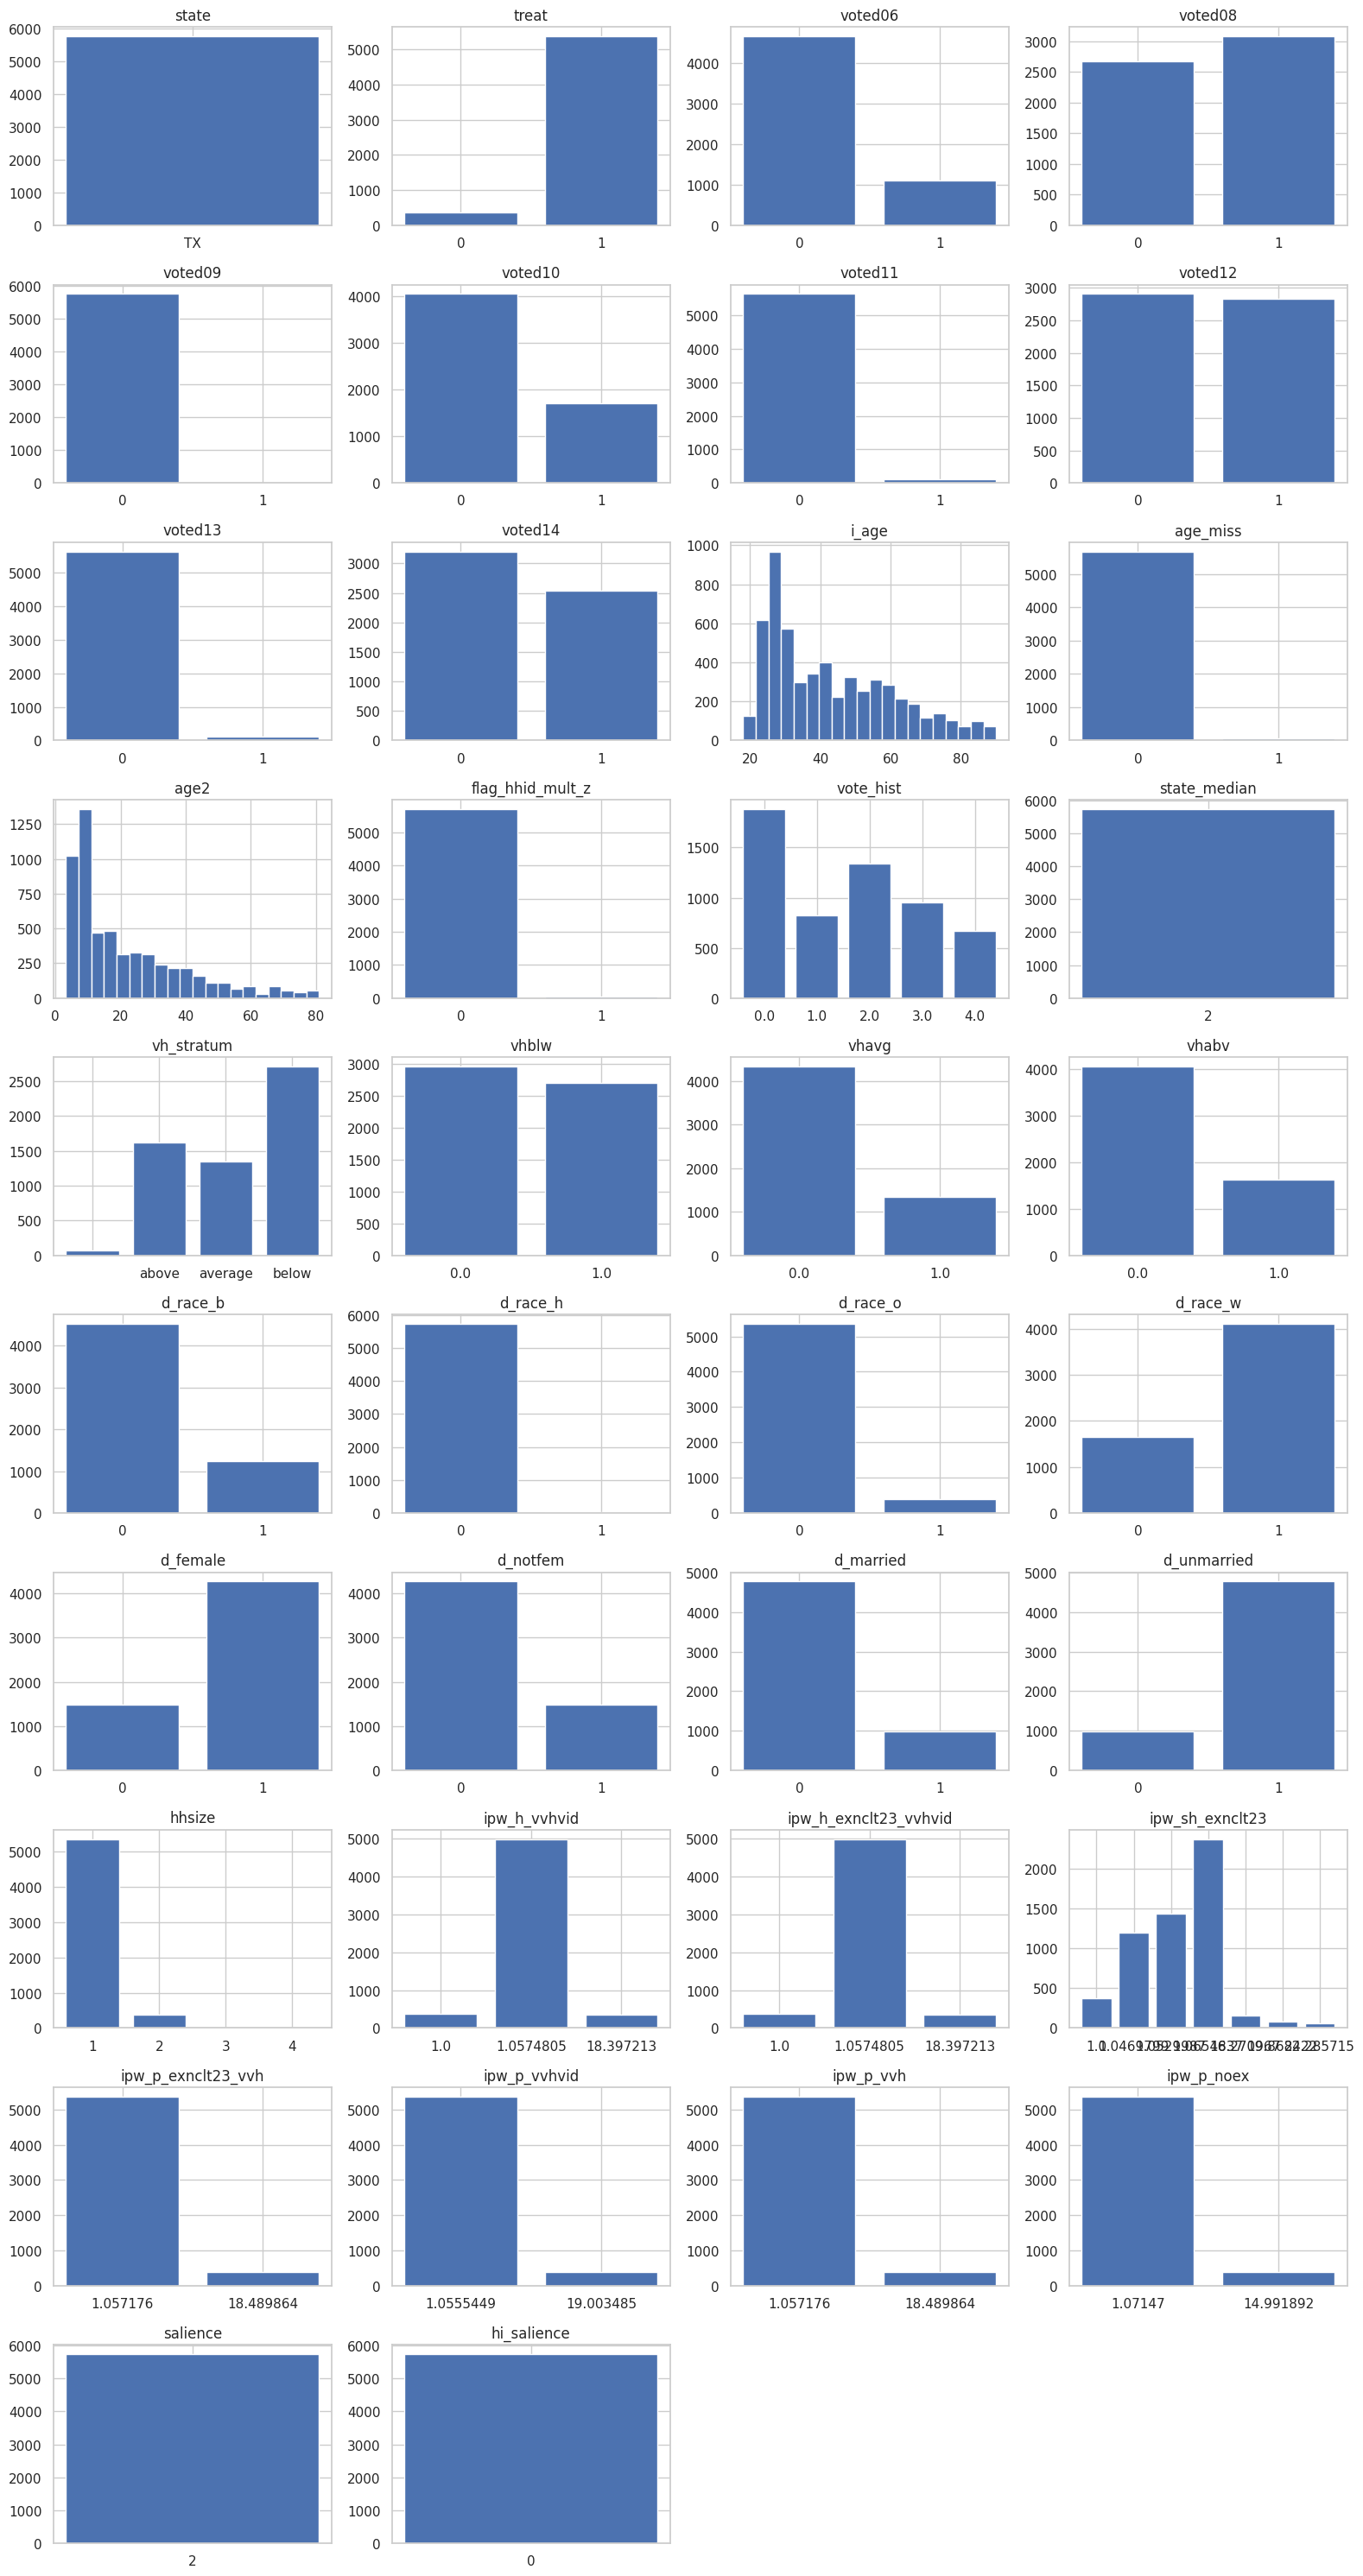

In [22]:
variables_to_plot = [
    'state', 'treat', 'voted06', 'voted08', 'voted09',
       'voted10', 'voted11', 'voted12', 'voted13', 'voted14', 'i_age',
       'age_miss', 'age2', 'flag_hhid_mult_z',
       'vote_hist', 'state_median', 'vh_stratum', 'vhblw',
       'vhavg', 'vhabv', 'd_race_b', 'd_race_h', 'd_race_o', 'd_race_w',
       'd_female', 'd_notfem', 'd_married', 'd_unmarried', 'hhsize', 'ipw_h_vvhvid',
       'ipw_h_exnclt23_vvhvid', 'ipw_sh_exnclt23', 'ipw_p_exnclt23_vvh',
       'ipw_p_vvhvid', 'ipw_p_vvh', 'ipw_p_noex', 'salience', 'hi_salience'
]

n_vars = len(variables_to_plot)
n_cols = 4
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows))
axes = axes.flatten()

for i, var in enumerate(variables_to_plot):
    ax = axes[i]
    if df[var].nunique() < 10:
        value_counts = df[var].dropna().value_counts().sort_index()
        ax.bar(value_counts.index.astype(str), value_counts.values)
    else:
        df[var].dropna().hist(ax=ax, bins=20)
    ax.set_title(var)
    
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [10]:
max_file_number = 99
df_results = pd.concat([pd.read_csv(f'results/policy_learning_results_{i}.csv') for i in range(max_file_number)], ignore_index=True)
# df_results = pd.read_csv('results/policy_learning_results_None.csv')

avg_results = df_results.groupby(['state', 'c']).agg({
    'pv_cates_means': 'mean',
    'pv_cates_sds': 'mean',
    'pv_trees_means': 'mean',
    'pv_trees_sds': 'mean',
    'pv_ates_means': 'mean',
    'pv_ates_sds': 'mean'
}).reset_index()

grouped_by_state = avg_results.groupby(['state'])



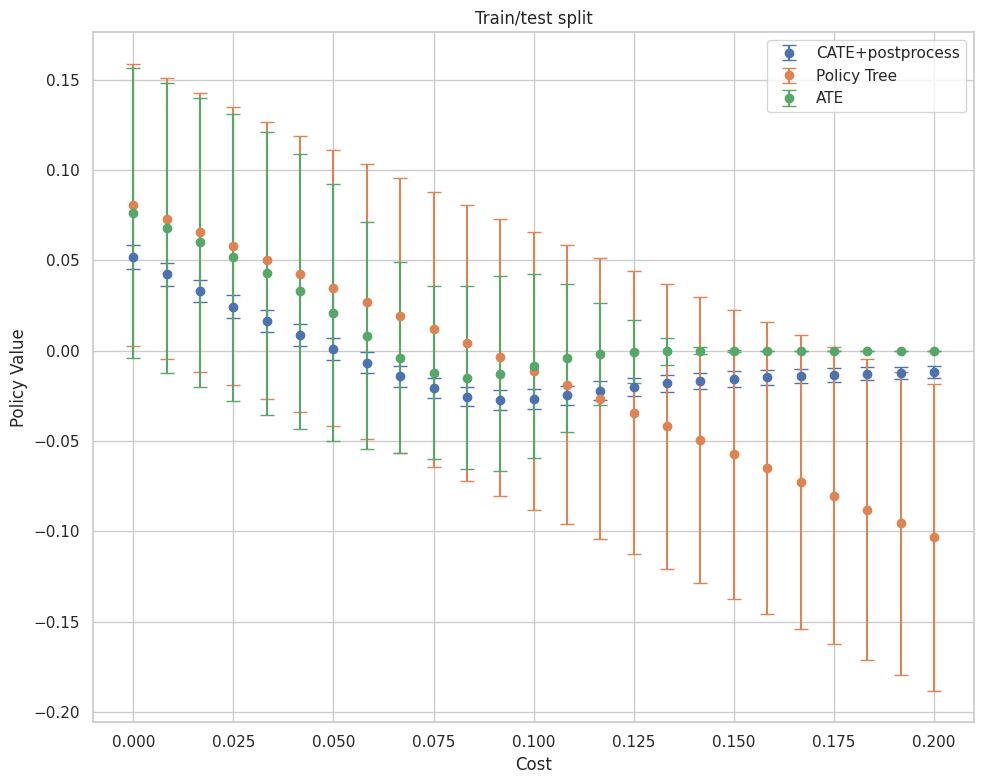

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# for i, (state, group) in enumerate(grouped_by_state):
    # ax_index = i // 5
    # ax_subindex = i % 5
    # ax = axes[ax_index, ax_subindex]
B = 100
# ax.set_title(f"{state[0]}")
ax.set_xlabel("Cost")
ax.set_ylabel("Policy Value")
ax.errorbar(
    avg_results['c'], 
    avg_results['pv_cates_means'], 
    yerr=1.96 * avg_results['pv_cates_sds'] / np.sqrt(B), 
    fmt='o', 
    capsize=5, 
    linestyle='none', 
    label='CATE+postprocess'
)
ax.errorbar(
    avg_results['c'], 
    avg_results['pv_trees_means'], 
    yerr=1.96 * avg_results['pv_trees_sds'], 
    fmt='o', 
    capsize=5, 
    linestyle='none', 
    label='Policy Tree'
)
ax.errorbar(
    avg_results['c'], 
    avg_results['pv_ates_means'], 
    yerr=1.96 * avg_results['pv_ates_sds'], 
    fmt='o', 
    capsize=5, 
    linestyle='none', 
    label='ATE'
)
ax.set_title("Train/test split")
ax.legend()
fig.tight_layout()
plt.savefig('oos_policy_learning.png')
plt.show()